In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy import stats
from datetime import datetime, timedelta
from matplotlib.axes import Axes
import xesmf as xe

/home/manmeet/anaconda3/envs/py35/lib/python3.7/site-packages/xarray/core/merge.py:16: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


In [2]:
data_dir = '18821001.000000.ocean_temp_salt.res.nc'  # daily
ds_temp_salt_w = xr.open_dataset(data_dir)

data_dir = 'regrid.nc'  # daily
ds_temp_salt_godas = xr.open_dataset(data_dir)

data_dir = 'grid_spec_192_94_360_200.nc'  # daily
ds_grid_spec_360x200 = xr.open_dataset(data_dir)

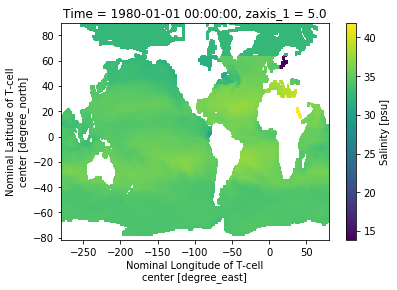

In [3]:
ds_temp_salt_godas.salt.isel(zaxis_1=0).plot()

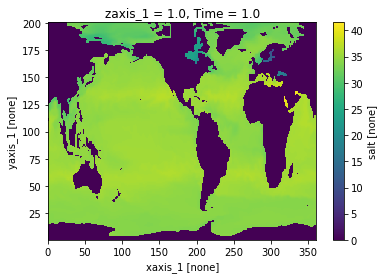

In [4]:
ds_temp_salt_w.salt.isel(zaxis_1=0).plot()

In [57]:
ds_temp_salt_godas_ = ds_temp_salt_godas.copy()
# for ii in ds_temp_salt_godas_.data_vars:
#         print(ds_temp_salt_godas_[ii].name)
#         for i in range(ds_temp_salt_godas_[ii].shape[1]):
#             for j in range(ds_temp_salt_godas_[ii].shape[2]):
#                 ds_temp_salt_godas_[ii][0,i,j,:][np.isnan(ds_temp_salt_godas_[ii][0,i,j,:])] = 0.0  
ds_temp_salt_godas_ = ds_temp_salt_godas_.fillna(0.0)

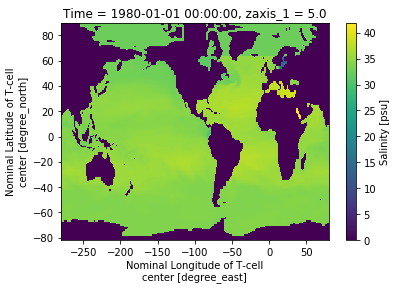

In [58]:
ds_temp_salt_godas_.salt.isel(zaxis_1=0).plot()

In [59]:
diff = ds_temp_salt_godas_.isel(zaxis_1=0).isel(Time=0).copy()
diff['temp_w'] = (('yaxis_1', 'xaxis_1'), ds_temp_salt_w.temp.isel(zaxis_1=0).isel(Time=0).values)
diff['salt_w'] = (('yaxis_1', 'xaxis_1'), ds_temp_salt_w.salt.isel(zaxis_1=0).isel(Time=0).values)
diff['temp_godas_'] = (('yaxis_1', 'xaxis_1'), ds_temp_salt_godas_.temp.isel(zaxis_1=0).isel(Time=0).values)
diff['salt_godas_'] = (('yaxis_1', 'xaxis_1'), ds_temp_salt_godas_.salt.isel(zaxis_1=0).isel(Time=0).values)

In [60]:
# for ii in diff.data_vars:
#         print(diff[ii].name)
#         data = ds_temp_salt_godas_[ii].values - ds_temp_salt_w[ii].isel(zaxis_1=0).isel(Time=0).values
#         diff[ii] = (('yaxis_1', 'xaxis_1'), data)

In [61]:
diff

<xarray.Dataset>
Dimensions:      (xaxis_1: 360, yaxis_1: 200)
Coordinates:
    Time         object 1980-01-01 00:00:00
  * xaxis_1      (xaxis_1) float64 -279.5 -278.5 -277.5 ... 77.5 78.5 79.5
  * yaxis_1      (yaxis_1) float64 -81.5 -80.5 -79.5 -78.5 ... 87.5 88.5 89.49
    zaxis_1      float64 5.0
Data variables:
    temp         (yaxis_1, xaxis_1) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    salt         (yaxis_1, xaxis_1) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    temp_w       (yaxis_1, xaxis_1) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    salt_w       (yaxis_1, xaxis_1) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    temp_godas_  (yaxis_1, xaxis_1) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    salt_godas_  (yaxis_1, xaxis_1) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    history:  Thu Apr  9 19:59:19 2020: ncrename -d GRID_X_T,xaxis_1 -v GRID_...

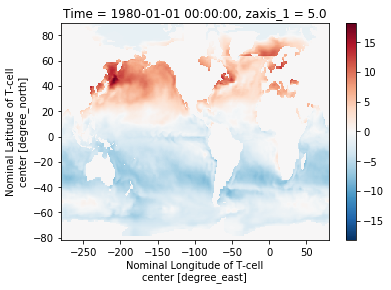

In [62]:
(diff.temp_w - diff.temp_godas_).plot()

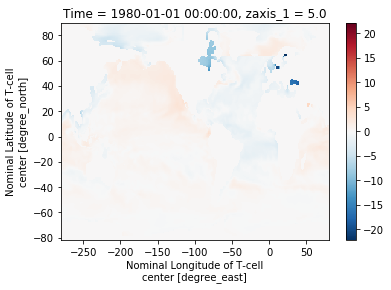

In [63]:
(diff.salt_w - diff.salt_godas_).plot()

In [64]:
ds_temp_salt_w_ = ds_temp_salt_w.copy()

In [65]:
ds_temp_salt_w_['temp'] = (('Time', 'zaxis_1', 'yaxis_1', 'xaxis_1'), ds_temp_salt_godas_['temp'].values)
ds_temp_salt_w_['temp'].attrs['units'] = "none"
ds_temp_salt_w_['temp'].attrs['long_name'] = "temp"
ds_temp_salt_w_['salt'] = (('Time', 'zaxis_1', 'yaxis_1', 'xaxis_1'), ds_temp_salt_godas_['salt'].values)
ds_temp_salt_w_['salt'].attrs['units'] = "none"
ds_temp_salt_w_['salt'].attrs['long_name'] = "salt"

In [66]:
ds_temp_salt_w_.to_netcdf('ocean_temp_salt.res_godas.nc')

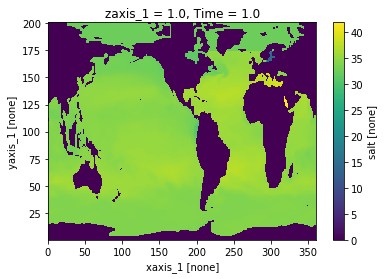

In [67]:
ds_temp_salt_w_.salt.isel(zaxis_1=0).plot()